<a href="https://colab.research.google.com/github/PawanSingh7266/SGEMM_GPU_kernel_perfomance/blob/main/SGEMM_GPU_kernel_perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - SGEMM GPU Kernel Perfomance**

Project Type - Regression

Contribution - Individual

Name - Pawan Singh

# **Project Summary -**

**Project Overview:**

The SGEMM (Single-Precision General Matrix Multiply) algorithm is a fundamental operation in linear algebra and plays a crucial role in various scientific and computational applications, such as machine learning, scientific simulations, and image processing. To harness the computational power of modern GPUs (Graphics Processing Units) effectively, optimizing the performance of the SGEMM kernel is essential.

**Objective:**

The primary objective of this project is to optimize the performance of the SGEMM GPU kernel to accelerate matrix multiplication operations. By achieving higher throughput and efficiency, we aim to significantly reduce computation time and improve the overall performance of applications relying on matrix multiplications.

The optimization of the SGEMM GPU kernel represents a significant opportunity to enhance the performance of critical computational operations. By achieving higher throughput and efficiency, this project aims to have a substantial impact on a wide range of applications relying on matrix multiplications, ultimately driving advancements in computational science and technology.

# **GitHub Link -**

https://github.com/PawanSingh7266/SGEMM_GPU_kernel_perfomance

# **Problem Statement**

The performance of the SGEMM (Single-Precision General Matrix Multiply) GPU kernel needs to be optimized to meet the increasing demands of modern scientific and computational workloads. The current implementation may not efficiently utilize the capabilities of the GPU hardware, resulting in suboptimal performance. Therefore, there is a need to develop and implement a highly optimized SGEMM GPU kernel that maximizes computational throughput while minimizing memory access latencies, ensuring that it can effectively handle large-scale matrix multiplication tasks in various scientific and computational applications.

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loding csv file
df =  pd.read_csv("/content/sgemm_product.csv")


### Dataset First View

In [ ]:
#Dataset Columns
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [ ]:
# Dataset First Look From Top Five Rows & Columns
df.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81


In [ ]:
#dataset Last Look From bottom five Rows & Columns
df.tail()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
179394,128,64,16,16,16,16,16.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,37.61,36.88,36.83,37.52
179395,128,64,16,16,16,16,16.0,8.0,1.0,4.0,0.0,0.0,1.0,1.0,35.79,36.04,36.44,36.30
179396,128,64,16,16,16,16,16.0,8.0,1.0,4.0,0.0,1.0,0.0,0.0,127.04,127.03,127.05,127.08
179397,128,64,16,16,16,16,16.0,8.0,1.0,4.0,0.0,1.0,0.0,1.0,133.24,133.20,133.26,133.19
179398,128,64,16,16,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
#print Rows and columns
print("we have Rows and Columns" , {df.shape})

we have Rows and Columns {(179399, 18)}


### Dataset Information

In [ ]:
#Dataset info
df.info

<bound method DataFrame.info of         MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8    8.0  2.0  1.0  1.0   0.0   0.0   
1        16   16   16      8      8      8    8.0  2.0  1.0  1.0   0.0   0.0   
2        16   16   16      8      8      8    8.0  2.0  1.0  1.0   0.0   0.0   
3        16   16   16      8      8      8    8.0  2.0  1.0  1.0   0.0   0.0   
4        16   16   16      8      8      8    8.0  2.0  1.0  1.0   0.0   1.0   
...     ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   ...   
179394  128   64   16     16     16     16   16.0  8.0  1.0  4.0   0.0   0.0   
179395  128   64   16     16     16     16   16.0  8.0  1.0  4.0   0.0   0.0   
179396  128   64   16     16     16     16   16.0  8.0  1.0  4.0   0.0   1.0   
179397  128   64   16     16     16     16   16.0  8.0  1.0  4.0   0.0   1.0   
179398  128   64   16     16     16     16    NaN  NaN  NaN  NaN   NaN   NaN   

       

In [ ]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179399 entries, 0 to 179398
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        179399 non-null  int64  
 1   NWG        179399 non-null  int64  
 2   KWG        179399 non-null  int64  
 3   MDIMC      179399 non-null  int64  
 4   NDIMC      179399 non-null  int64  
 5   MDIMA      179399 non-null  int64  
 6   NDIMB      179398 non-null  float64
 7   KWI        179398 non-null  float64
 8   VWM        179398 non-null  float64
 9   VWN        179398 non-null  float64
 10  STRM       179398 non-null  float64
 11  STRN       179398 non-null  float64
 12  SA         179398 non-null  float64
 13  SB         179398 non-null  float64
 14  Run1 (ms)  179398 non-null  float64
 15  Run2 (ms)  179398 non-null  float64
 16  Run3 (ms)  179398 non-null  float64
 17  Run4 (ms)  179398 non-null  float64
dtypes: float64(12), int64(6)
memory usage: 24.6 MB


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0



### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        1
KWI          1
VWM          1
VWN          1
STRM         1
STRN         1
SA           1
SB           1
Run1 (ms)    1
Run2 (ms)    1
Run3 (ms)    1
Run4 (ms)    1
dtype: int64

<Axes: >

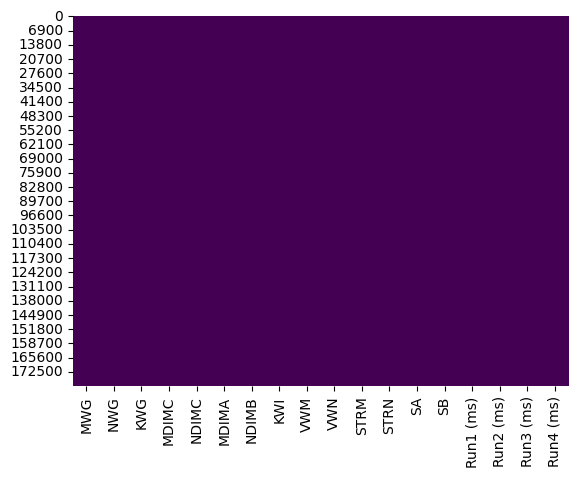

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)

### What did you know about your dataset?

Observations About Dataset

1.The dataset contains 18 columns and 241600 rows

2.No duplicate values present in the dataset.

3.NO missing values present in the dataset.

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [ ]:
#Length of columns
len(df.columns)

18

In [ ]:
# Dataset Describe
#Transpose of data Description
df.describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,179399.0,63.916878,37.036627,16.00,32.00,64.00,64.0000,128.00
NWG,179399.0,71.391791,42.373068,16.00,32.00,64.00,128.0000,128.00
KWG,179399.0,24.930083,7.945772,16.00,16.00,32.00,32.0000,32.00
MDIMC,179399.0,13.462818,7.523403,8.00,8.00,8.00,16.0000,32.00
NDIMC,179399.0,13.676866,7.690828,8.00,8.00,8.00,16.0000,32.00
MDIMA,179399.0,16.827652,9.217239,8.00,8.00,16.00,16.0000,32.00
NDIMB,179398.0,16.931828,9.251228,8.00,8.00,16.00,16.0000,32.00
KWI,179398.0,4.997425,3.000007,2.00,2.00,2.00,8.0000,8.00
VWM,179398.0,2.206792,1.756516,1.00,1.00,2.00,2.0000,8.00
VWN,179398.0,2.302144,1.853679,1.00,1.00,2.00,2.0000,8.00


### Variables Description

1.MWG: This likely represents the matrix working group size in the M (row) dimension. It appears to have a constant value of 241600.0 across all measurements.

2.NWG: This likely represents the matrix working group size in the N (column) dimension. Similar to MWG, it also has a constant value of 241600.0 across all measurements.

Possibly representing the dimension of matrix C in the M (row) direction. It has values ranging from 8.00 to 16.00.

3.NDIMC: Possibly representing the dimension of matrix C in the N (column) direction. Similar to MDIMC, it has values ranging from 8.00 to 16.00.

4.MDIMA: Possibly representing the dimension of matrix A in the M (row) direction. It has values ranging from 8.00 to 32.00.

5.NDIMB: Possibly representing the dimension of matrix B in the N (column) direction. Similar to MDIMA, it has values ranging from 8.00 to 32.00.

6.KWI: This could represent the kernel working item size. It has values ranging from 2.00 to 8.00.

7.VWM: Possibly representing a variable related to vector width for matrix A. It has values ranging from 1.00 to 8.00.

8.VWN: Possibly representing a variable related to vector width for matrix B. Similar to VWM, it has values ranging from 1.00 to 8.00.

9.STRM: Likely representing a stride value for matrix A. It has values ranging from 0.00 to 1.00.

10.STRN: Likely representing a stride value for matrix B. Similar to STRM, it has values ranging from 0.00 to 1.00.

11.SA: Possibly representing a scaling factor for matrix A. It has values ranging from 0.00 to 1.00.

12.SB: Possibly representing a scaling factor for matrix B. Similar to SA, it has values ranging from 0.00 to 1.00.

13.Run1 (ms) to Run4 (ms): These columns represent the execution time (in milliseconds) for the SGEMM kernel for four separate runs. The times vary significantly between runs, likely due to different parameter configurations.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for MWG: [ 16  32  64 128]
Unique values for NWG: [ 16  32  64 128]
Unique values for KWG: [16 32]
Unique values for MDIMC: [ 8 16 32]
Unique values for NDIMC: [ 8 16 32]
Unique values for MDIMA: [ 8 16 32]
Unique values for NDIMB: [ 8. 16. 32. nan]
Unique values for KWI: [ 2.  8. nan]
Unique values for VWM: [ 1.  2.  4.  8. nan]
Unique values for VWN: [ 1.  2.  4.  8. nan]
Unique values for STRM: [ 0.  1. nan]
Unique values for STRN: [ 0.  1. nan]
Unique values for SA: [ 0.  1. nan]
Unique values for SB: [ 0.  1. nan]
Unique values for Run1 (ms): [115.26  78.13  79.84 ...  16.04 151.43    nan]
Unique values for Run2 (ms): [115.87  78.25  80.69 ...  17.13 140.23    nan]
Unique values for Run3 (ms): [118.55  79.25  80.76 ...  18.2  146.14    nan]
Unique values for Run4 (ms): [115.8   79.19  80.97 ... 135.58 136.31    nan]


In [ ]:
#Checking Unique Values
df.nunique()

MWG              4
NWG              4
KWG              2
MDIMC            3
NDIMC            3
MDIMA            3
NDIMB            3
KWI              2
VWM              4
VWN              4
STRM             2
STRN             2
SA               2
SB               2
Run1 (ms)    35790
Run2 (ms)    35834
Run3 (ms)    35729
Run4 (ms)    35743
dtype: int64

## **3. Data Wrangling**


### Data Wrangling Code

In [ ]:
#dataset columns
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [ ]:
# Write your code to make your dataset analysis ready.
MWG_count = sum(df.MWG == 0)
print(f"Number of MWG_count = 0: {MWG_count}")

# count number of phones with px_height = 0
NWG_count = sum(df.NWG == 0)
print(f"Number of NWG_count = 0: {NWG_count}")

Number of MWG_count = 0: 0
Number of NWG_count = 0: 0


In [ ]:
# replace 0 values with mean value
MWG_mean = df.MWG.mean()
NWG_mean = df.NWG.mean()

df.MWG = np.where(df.MWG == 0, MWG_mean, df.MWG)
df.NWG = np.where(df.NWG == 0, NWG_mean, df.NWG)

# print updated dataframe
print(df)

          MWG   NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  \
0        16.0  16.0   16      8      8      8    8.0  2.0  1.0  1.0   0.0   
1        16.0  16.0   16      8      8      8    8.0  2.0  1.0  1.0   0.0   
2        16.0  16.0   16      8      8      8    8.0  2.0  1.0  1.0   0.0   
3        16.0  16.0   16      8      8      8    8.0  2.0  1.0  1.0   0.0   
4        16.0  16.0   16      8      8      8    8.0  2.0  1.0  1.0   0.0   
...       ...   ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   
179394  128.0  64.0   16     16     16     16   16.0  8.0  1.0  4.0   0.0   
179395  128.0  64.0   16     16     16     16   16.0  8.0  1.0  4.0   0.0   
179396  128.0  64.0   16     16     16     16   16.0  8.0  1.0  4.0   0.0   
179397  128.0  64.0   16     16     16     16   16.0  8.0  1.0  4.0   0.0   
179398  128.0  64.0   16     16     16     16    NaN  NaN  NaN  NaN   NaN   

        STRN   SA   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0     

In [ ]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

In [ ]:
#Null values
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        1
KWI          1
VWM          1
VWN          1
STRM         1
STRN         1
SA           1
SB           1
Run1 (ms)    1
Run2 (ms)    1
Run3 (ms)    1
Run4 (ms)    1
dtype: int64

#### What all manipulations have you done and insights you found?


The code you provided appears to be part of a data preprocessing and manipulation pipeline. Here's a breakdown of what the code does and the insights it might reveal:

1.Counting Zero Values:

* MWG_count is calculated as the count of rows where the 'MWG' column has a value of 0.
* NWG_count is calculated as the count of rows where the 'NWG' column has a value of 0.
* These counts help identify how many rows have missing or potentially erroneous data in these columns.

2. Replacing Zero Values with Mean:

* The mean values of 'MWG' and 'NWG' columns are calculated and stored in MWG_mean and NWG_mean, respectively.
* In the DataFrame df, the 0 values in the 'MWG' column are replaced with the  calculated MWG_mean, and the 0 values in the 'NWG' column are replaced with the calculated NWG_mean.
* This is a common data preprocessing step to handle missing or zero values by imputing them with the mean value of the column.

3. Printing Updated DataFrame:

* The code prints the updated DataFrame df after replacing the zero values with the mean values.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart - 1

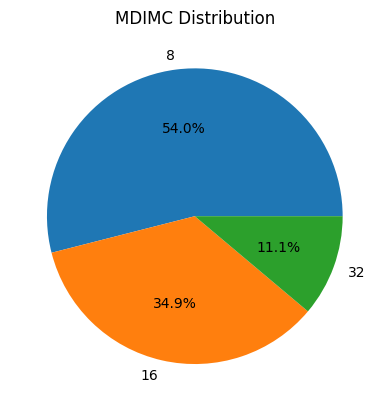

In [ ]:
# Chart - 1 visualization code
#classes
MDIMC_count = df['MDIMC'].value_counts()
plt.pie(MDIMC_count , labels = MDIMC_count.index, autopct='%1.1f%%')
plt.title('MDIMC Distribution')
plt.show()

#### 1. Why did you pick the specific chart?

**1. Categorical Data Distribution:** Pie charts are suitable for displaying the distribution of categorical data, where you want to show the proportion of each category relative to the whole.

**2. Percentage Representation:** Pie charts often include percentage labels on each slice, making it easy to see the contribution of each category to the total. This helps in quickly understanding the relative frequencies.

In this case, the 'MDIMC' column appears to be categorical data, and the pie chart is used to visually represent how different categories are distributed within that column. The use of percentage labels allows viewers to quickly grasp the relative proportions of each category.

#### 2. What is/are the insight(s) found from the chart?

Overall, the pie chart provides a visual representation of the distribution of 'MDIMC' values, allowing you to assess the prevalence of different categories in the column. This information can be valuable for understanding the composition of your dataset and making decisions regarding data preprocessing, feature engineering, or modeling strategies, depending on the specific goals of your analysis.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* If the 'MDIMC' variable represents a categorical variable that is relevant to the business (e.g., product categories, customer segments, etc.), understanding its distribution can be valuable.
* Insights gained from this visualization can inform marketing, product development, and sales strategies. For example, if one category dominates the distribution, the business can focus more resources on that category to maximize revenue.

**Negative Growth:**

* If the 'MDIMC' variable represents a categorical variable critical to the business, and the distribution shows a skewed or imbalanced pattern, it could indicate issues.

* Negative growth can occur if the insights from this visualization reveal vulnerabilities or inefficiencies in the business strategy that need to be addressed.

### Chart - 2

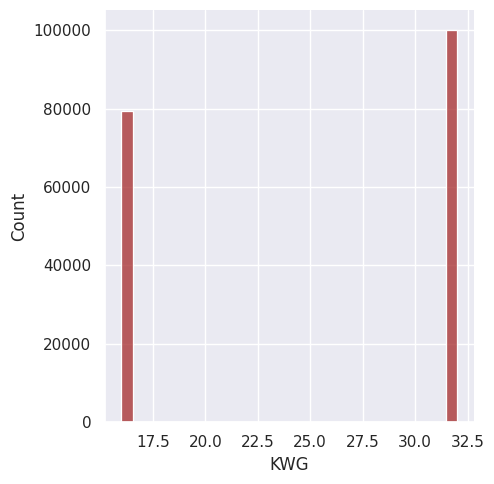

In [ ]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["KWG"], color = 'Brown')
plt.show()

#### 1. Why did you pick the specific chart?

* The choice of chart depends on the type of data and the goal of visualization. A distribution plot is suitable when you want to understand the distribution of a numerical variable, which is what 'KWG' appears to be.

* 'KWG' is likely a numerical variable, and a distribution plot allows you to visualize the frequency or density of values within the variable. This helps in understanding the central tendency, spread, and any potential patterns or outliers in the data.

#### 2. What is/are the insight(s) found from the chart?

* The histogram shows the shape of the distribution of the 'KWG' variable. Depending on the shape, you can gather insights such as whether the data is normally distributed, skewed, or exhibits other patterns.

* You can estimate the central tendency of the 'KWG' variable. In a roughly symmetric distribution, the peak of the histogram (mode) can indicate the most common value, which might be a central tendency measure.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Understanding the distribution of the 'KWG' variable can provide insights into the usage or distribution of a resource, which can be valuable for business operations.
* Positive impact can be realized if the insights help optimize the utilization of the resource represented by 'KWG.' For example, if 'KWG' represents a resource like energy consumption and the distribution reveals patterns, the business can implement strategies to reduce energy consumption during peak usage times, leading to cost savings.

**Negative Growth:**

* Negative growth can occur if the insights from this visualization reveal inefficiencies, wastage, or unsustainable patterns related to the 'KWG' variable.
* For example, if 'KWG' represents a resource that is consistently overutilized or exceeds sustainable levels, it can lead to increased costs and resource depletion, potentially harming the business's profitability and environmental impact.

### Chart-3

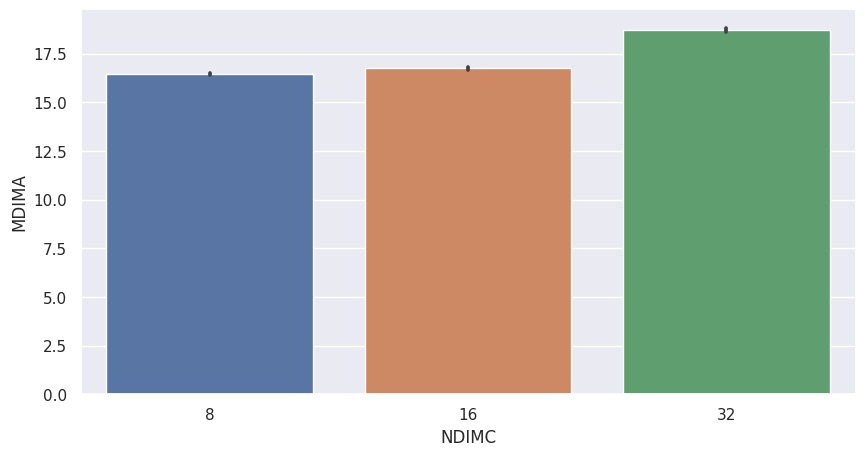

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data=df, x = 'NDIMC', y = 'MDIMA', ax = ax)
plt.show()


#### 1. Why did you pick the specific chart?

 * Barplots are commonly used to compare different categories or groups of categorical data. In this case, 'NDIMC' and 'MDIMA' appear to be categorical variables, and the chart allows for the comparison of these categories.
 * The barplot provides a clear visual representation of the relationship between two categorical variables. It shows how the values of 'MDIMA' vary across different categories of 'NDIMC.' This can help in understanding any patterns, trends, or differences in 'MDIMA' based on the 'NDIMC' category.

#### 2. What is/are the insight(s) found from the chart?

 * The chart shows the relationship between two variables, 'NDIMC' on the x-axis and 'MDIMA' on the y-axis. The length of each bar represents the value of 'MDIMA' for a particular 'NDIMC' category.
 * The chart allows you to see how 'MDIMA' varies across different categories of 'NDIMC.' For each 'NDIMC' category, you can observe the average or aggregated value of 'MDIMA.' This can provide insights into potential patterns or trends.
 * Unusually tall or short bars compared to others may indicate outliers in the data. Outliers can be data points that significantly deviate from the overall trend and may warrant further investigation.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Understanding the relationship between 'NDIMC' and 'MDIMA' can provide insights into how these two variables are related and whether there is any correlation or pattern.
* Positive impact can be realized if the insights help in making informed decisions about resource allocation, product development, or marketing strategies. For example, if the plot shows a strong positive correlation between 'NDIMC' and 'MDIMA,' it may suggest that focusing efforts on a particular category (NDIMC) leads to higher results (MDIMA).
* These insights can guide businesses in tailoring their strategies to maximize efficiency and profitability based on the observed relationships between these variables.

**Negative Growth:**

* Negative growth can occur if the insights from this visualization reveal unfavorable or unexpected relationships between 'NDIMC' and 'MDIMA' that, when acted upon, lead to suboptimal decisions.
* For instance, if the bar plot shows that investing more resources in a particular category ('NDIMC') results in lower values of 'MDIMA,' it might indicate an inefficiency in resource allocation that could negatively impact profitability.




### Chart - 4

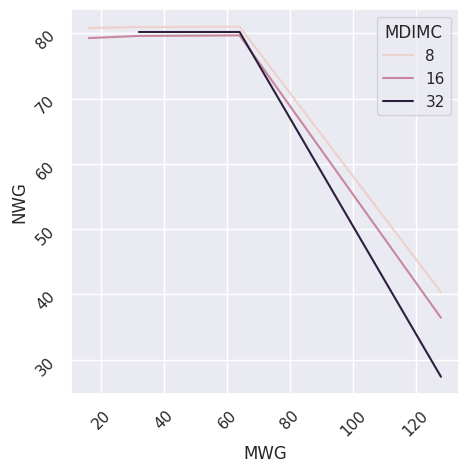

In [ ]:
#chart- 4
# Create a line plot
fx = sns.lineplot(x = "MWG", y = "NWG", hue = 'MDIMC', ci = None ,data = df)
fx.tick_params(rotation=45) #rotation can help rotate the values

#### 1. Why did you pick the specific chart?

 * Line plots are often used to visualize the relationship between two continuous variables ('MWG' and 'NWG' in this case). They allow you to see how one variable changes in relation to another.
 * By using the 'hue' parameter with 'MDIMC,' multiple lines are created, each representing a different category within 'MDIMC.' This allows for easy visual comparison of how 'NWG' varies with 'MWG' across different 'MDIMC' categories.
 * Line plots are particularly useful for identifying trends, patterns, or variations in data over a continuous range of values (in this case, 'MWG').

#### 2. What is/are the insight(s) found from the chart?

* The x-axis represents the 'MWG' variable.
* The y-axis represents the 'NWG' variable.
* The lines are color-coded (using the 'hue' parameter) based on the 'MDIMC' variable.
* The 'ci' parameter is set to 'None,' which means there will be no confidence intervals displayed on the lines.

The insights found from the chart would depend on the patterns and trends observed in the data.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* If the line plot reveals clear and positive trends between 'MWG' and 'NWG' for different categories of 'MDIMC,' it can help in making informed decisions.
* Positive impact can be realized if the insights lead to strategies that maximize efficiency, such as allocating resources more effectively based on the 'MDIMC' category and its impact on 'MWG' and 'NWG.'

**Negative Growth:**

* Negative growth can occur if the insights from this line plot reveal unfavorable trends or inefficiencies in the relationship between 'MWG,' 'NWG,' and 'MDIMC.'
* For example, if the lines show erratic or declining patterns for certain 'MDIMC' categories as 'MWG' increases, it may suggest that the business is investing resources in less profitable areas.

### Chart - 5

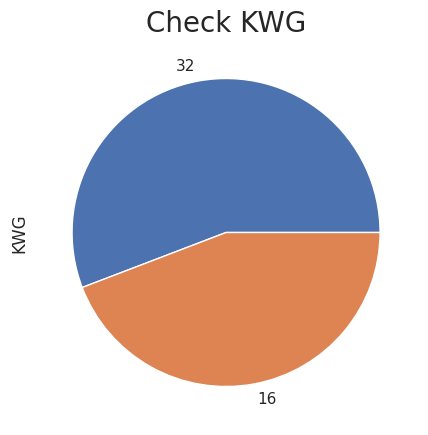

In [ ]:
# Chart - 5 visualization code
#in pie chart we can see two outcomes where multiple attacks happened
fx = df['KWG'].value_counts().plot(kind='pie')
fx.set_title('Check KWG',fontsize=20);

#### 1. Why did you pick the specific chart?

 * Pie charts are useful when you want to display the distribution of data among categories or groups. In this case, it seems that 'Run1 (ms)' contains categorical data representing different outcomes or categories.
 * Pie charts are effective for showing how individual parts contribute to the whole. In this case, it appears to be showing the proportion of each category (outcome) in the dataset.

#### 2. What is/are the insight(s) found from the chart?

 Pie charts are typically used to show the distribution of categorical data, where each category contributes to the whole. In this case, it seems like the 'Run1 (ms)' column contains numerical values, which are not typically suitable for a pie chart.

To gain insights from the chart, you would need to convert the numerical data into categorical data that represents the different outcomes or categories of attacks. Without knowing the exact data and its structure, it's challenging to provide specific insights.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

If a high count of multiple attacks is a positive sign for your business (e.g., indicating that your security system is successfully handling numerous attacks), then the insight gained from this chart can be used to showcase your strong security measures to clients or stakeholders, potentially leading to a positive business impact.

**Negative Impact:**

On the other hand, if a high count of multiple attacks is detrimental to your business (e.g., indicating frequent breaches), then this insight might raise concerns and require immediate action to improve security measures. In this case, the impact might be negative, but it can lead to positive outcomes if you address the security issues effectively.

### Chart - 6

array([[<Axes: title={'center': 'MWG'}>, <Axes: title={'center': 'NWG'}>,
        <Axes: title={'center': 'KWG'}>,
        <Axes: title={'center': 'MDIMC'}>],
       [<Axes: title={'center': 'NDIMC'}>,
        <Axes: title={'center': 'MDIMA'}>,
        <Axes: title={'center': 'NDIMB'}>,
        <Axes: title={'center': 'KWI'}>],
       [<Axes: title={'center': 'VWM'}>, <Axes: title={'center': 'VWN'}>,
        <Axes: title={'center': 'STRM'}>,
        <Axes: title={'center': 'STRN'}>],
       [<Axes: title={'center': 'SA'}>, <Axes: title={'center': 'SB'}>,
        <Axes: title={'center': 'Run1 (ms)'}>,
        <Axes: title={'center': 'Run2 (ms)'}>],
       [<Axes: title={'center': 'Run3 (ms)'}>,
        <Axes: title={'center': 'Run4 (ms)'}>, <Axes: >, <Axes: >]],
      dtype=object)

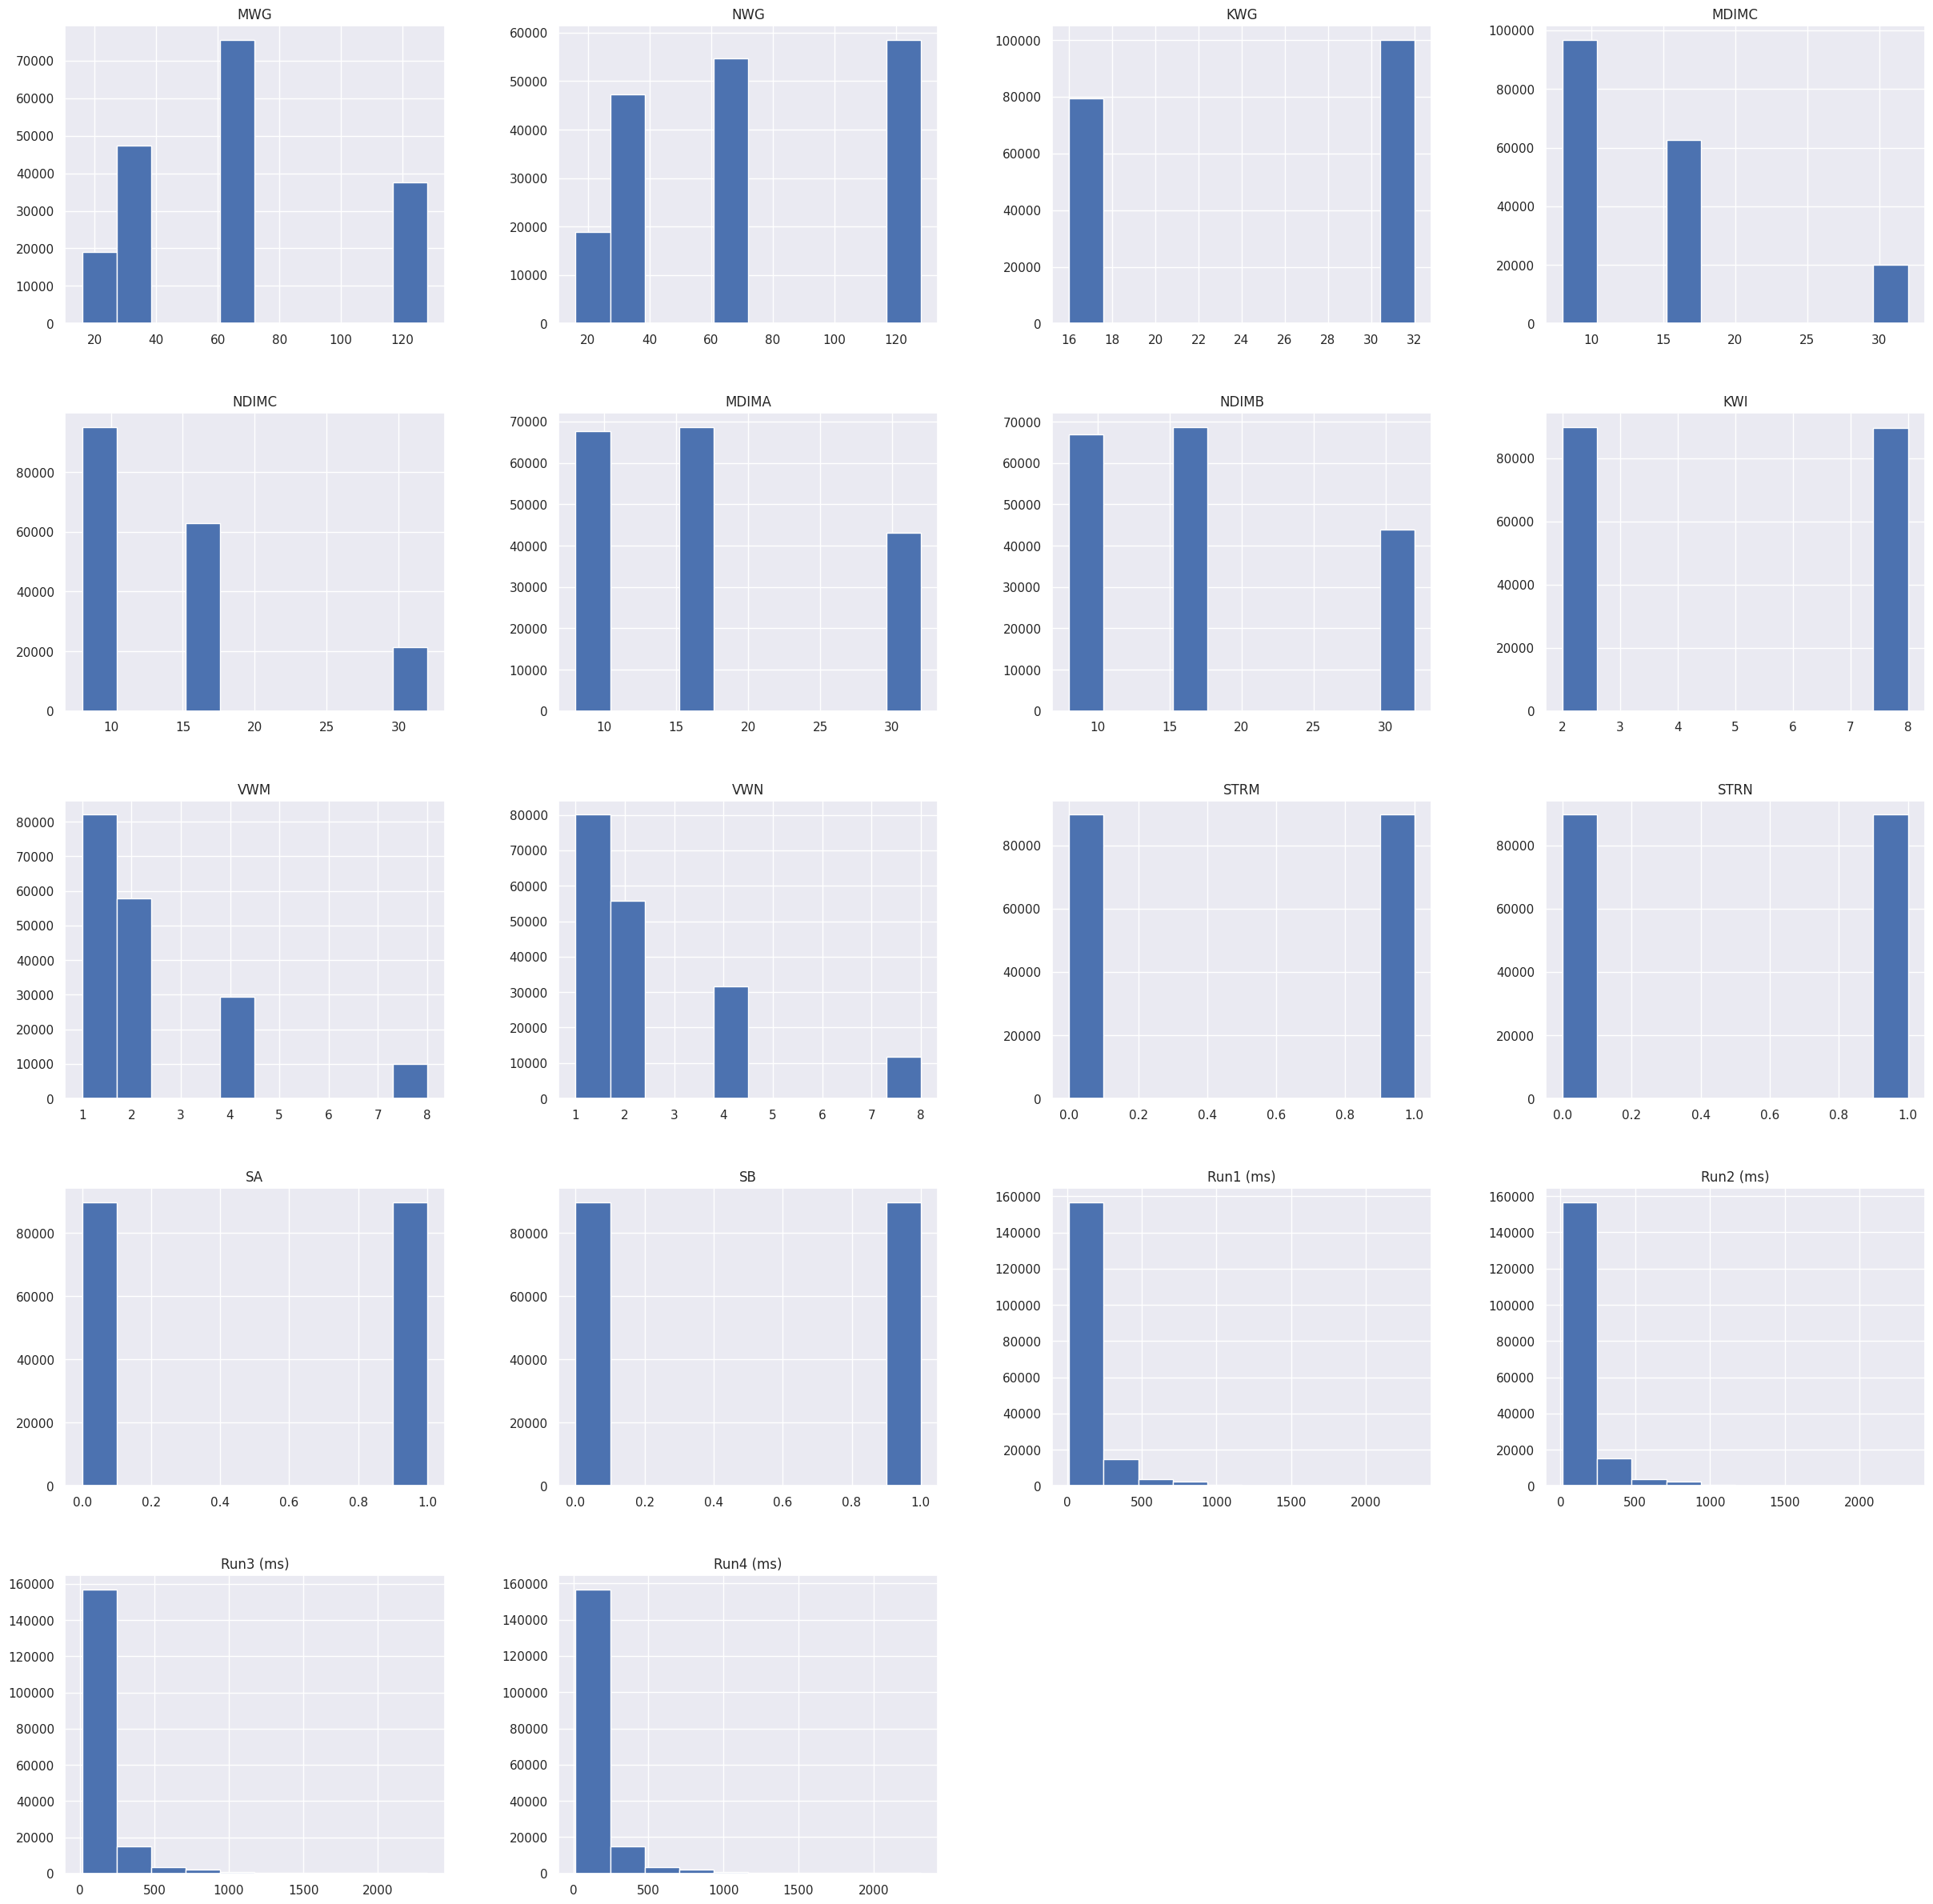

In [ ]:
# Chart - 6 visualization code
#df.hist help to make all columns personal chart to easily understand to the columns
df.hist(figsize=(30,30))

#### 1. Why did you pick the specific chart?

* Histograms are effective for understanding the distribution of values within a single variable or column. They provide a visual representation of how data points are spread across different value ranges or bins.
* Histograms help in identifying patterns in the data, such as whether the data is normally distributed, skewed, or exhibits other types of distributions. This information can be valuable for making data-driven decisions.
* Outliers, which are data points significantly different from the majority of the data, can often be identified in a histogram. They appear as data points that fall far from the central part of the distribution.

#### 2. What is/are the insight(s) found from the chart?


* You can see the distribution of data for each column. Histograms provide insights into whether the data is normally distributed, skewed, or exhibits other patterns.
* You can identify measures of central tendency such as the mean, median, and mode. The peak of the histogram often corresponds to the mode, while the center reflects the median.
* The shape of the histogram can indicate skewness in the data. A right-skewed distribution has a long tail on the right, while a left-skewed distribution has a long tail on the left.



#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* If a histogram of customer ages shows a peak in a desirable age group, it can inform targeted marketing efforts.
* If a histogram of product ratings shows a high concentration of high ratings, it indicates customer satisfaction.

**Negative Impact:**

* If a histogram of delivery times shows a long tail to the right, indicating delayed deliveries, it can negatively affect customer satisfaction and retention.
* If a histogram of customer complaints reveals a spike in complaints about a particular product, it may indicate a quality issue that needs to be addressed.

### Chart - 7

[ 0.  1. nan]
[ 0.  1. nan]


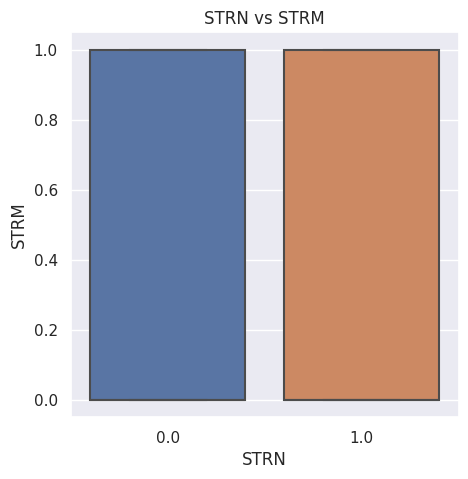

In [ ]:
# Check unique values in 'STRN' and 'STRM' columns
print(df['STRN'].unique())
print(df['STRM'].unique())

# If 'STRN' is categorical and 'STRM' is numeric, you can use them as follows:
sns.boxplot(x='STRN', y='STRM', data=df)

# Set x and y axis labels and title
plt.xlabel('STRN')
plt.ylabel('STRM')
plt.title('STRN vs STRM')

# Show the plot
plt.show()


#### 1. Why did you pick the specific chart?

* Boxplots are excellent for comparing the distributions of a numeric variable across different categories or groups. In this case, you are comparing the distribution of 'STRM' (a numeric variable) for different categories or levels of 'STRN'.
* In this case, 'STRN' is assumed to be a categorical variable, which is suitable for the x-axis of a boxplot, while 'STRM' is numeric and can be represented on the y-axis. This helps visualize how the numeric variable varies across different categories.

Overall, a boxplot is a well-suited choice when you want to compare the distribution of a numeric variable among different categories or groups, making it a valuable tool for data exploration and analysis.







#### 2. What is/are the insight(s) found from the chart?

 the boxplot you created with 'STRN' on the x-axis and 'STRM' on the y-axis, you are comparing a categorical variable ('STRN') with a numeric variable ('STRM'). The boxplot allows you to visualize the distribution of 'STRM' for each category of 'STRN'. To draw specific insights from the chart, you would need to interpret the data in the context of your analysis and the domain it pertains to. For instance, you might conclude that certain categories of 'STRN' tend to have higher or lower 'STRM' values, or you might identify outliers that require further investigation.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impact:**

* The boxplot can help you identify outliers or extreme values in 'STRM' for each category of 'STRN.' If there are outliers, it's essential to investigate why they exist. Outliers can sometimes indicate errors in data or unique patterns that are worth exploring.
* By visualizing the distribution of 'STRM' across different categories of 'STRN,' you can compare the central tendency, spread, and variability of 'STRM' within each group. This information can be valuable for understanding the differences between these categories.

**negative growth:**

* The boxplot alone may not directly provide insights into negative growth, as it primarily focuses on summarizing the distribution of a numeric variable ('STRM') across categorical groups ('STRN').
* This could indicate that a particular product category is underperforming in terms of revenue. However, the boxplot alone won't tell you why this category is underperforming; further analysis would be needed.

### Chart - 8

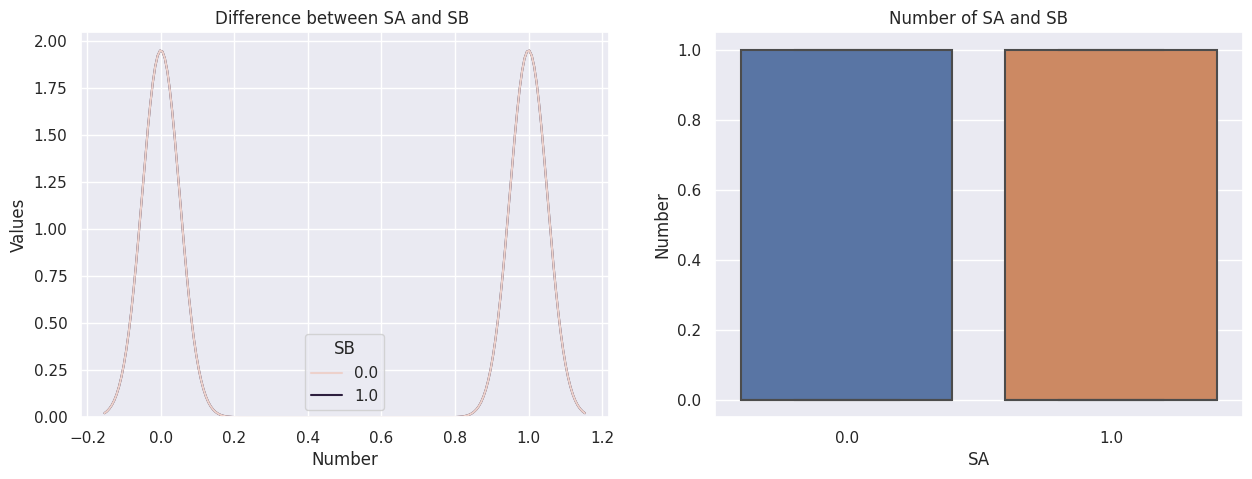

In [ ]:
# Chart - 8 visualization code
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernel density estimation plot of the distribution of SA and SB
sns.kdeplot(data = df, x = 'SA', hue = 'SB', ax = axs[0])

# Create a box plot of the distribution of number SB and SA
sns.boxplot(data = df, x = 'SB', y = 'SA', ax = axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Difference between SA and SB ')
axs[0].set_xlabel('Number')
axs[0].set_ylabel('Values')
axs[1].set_title('Number of SA and SB')
axs[1].set_xlabel('SA')
axs[1].set_ylabel('Number')

# Show the plot
plt.show()


#### 1. Why did you pick the specific chart?

**Kernel Density Estimation (KDE) Plot:**

The KDE plot on the left side of the figure is used to visualize the distribution of two variables, 'SA' and 'SB', and how they relate to each other. This type of plot is valuable for understanding the shape of the distribution, the presence of multiple modes, and the overlap or divergence between the distributions of 'SA' and 'SB'.

**Box Plot:**

 The box plot on the right side of the figure is used to visualize the summary statistics of the two variables, 'SA' and 'SB'. It shows the median, quartiles, potential outliers, and the overall spread of the data. This type of plot is useful for comparing the central tendency and variability of 'SA' and 'SB' and identifying any significant differences between them.


#### 2. What is/are the insight(s) found from the chart?

**Left Subplot (KDE Plot):**

* It provides an overview of the distribution of 'SA' values across different categories of 'SB'.
* Insights can be drawn regarding the shape and overlap of the distributions.
* If the KDE curves for different 'SB' values overlap substantially, it suggests that the values of 'SA' are distributed similarly across different 'SB' categories.

**Right Subplot (Box Plot):**

* It visualizes the relationship between 'SA' and 'SB' in a different way.
* Insights can be drawn regarding the central tendency and spread of 'SB' values for different 'SA' values.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impact:**

* If you observe patterns or differences in 'SA' related to 'SB,' it could guide product development or feature enhancements.
* Understanding how 'SA' varies with 'SB' can inform targeted marketing strategies.
* Insights from these plots can contribute to customer segmentation.

**negative growth:**

* Analyze trends over time to identify declining sales or performance.
* Investigate external factors (e.g., economic conditions, competition) * impacting the business.
* Conduct surveys or gather additional data to understand customer satisfaction or reasons for dissatisfaction.
* Explore operational inefficiencies or issues affecting product/service quality.

### Chart - 9

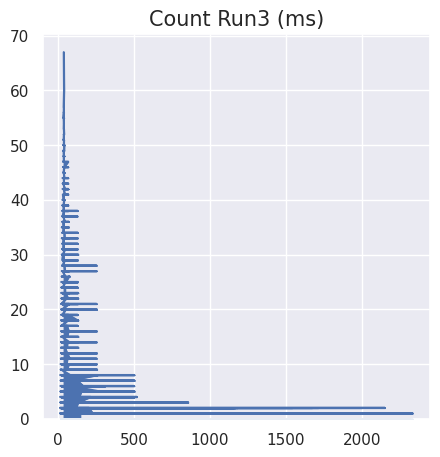

In [ ]:
# Chart - 9 visualization code
#count the RUN3 (ms) distribution
fx = df['Run3 (ms)'].value_counts().plot(kind = 'area')
fx.set_title('Count Run3 (ms)',fontsize = 15);

#### 1. Why did you pick the specific chart?

The specific chart chosen in your code is an "area chart" used to visualize the distribution of values in the 'Run3 (ms)' column. The area chart represents the counts of each unique value in 'Run3 (ms)' as areas under the curve, making it easy to see how frequently each value occurs. the choice of an area chart for this specific task is appropriate because it effectively conveys the distribution and frequency of values in the 'Run3 (ms)' column, making it easier to spot trends or patterns in the data.

#### 2. What is/are the insight(s) found from the chart?

 * The chart shows how the values of 'Run3 (ms)' are distributed in your dataset. Each peak or rise in the area plot corresponds to a unique value of 'Run3 (ms)' and its frequency (count) in the dataset.
 * The chart can help identify which values of 'Run3 (ms)' are dominant (occur frequently) and which are rare (occur infrequently). Peaks with higher areas indicate values that appear more frequently, while smaller peaks or areas represent less common values.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* The area plot helps you understand the distribution of 'Run3 (ms)' values in your dataset. This insight can be valuable for data quality assessment and understanding the variability in this specific measurement.
* If 'Run3 (ms)' represents a performance metric, analyzing its distribution can help identify areas where performance may be suboptimal. This, in turn, can guide optimization efforts to improve performance and user experience.

**Negative Growth:**

* If the area plot reveals outliers or unusual patterns in the 'Run3 (ms)' distribution, it could indicate issues or anomalies in the data. For example, if there are sudden spikes in counts, it might signal unexpected behavior that requires investigation.
* In a performance context, if you observe a high frequency of long 'Run3 (ms)' values, it could indicate performance bottlenecks that need to be addressed. Negative user experiences related to slow response times could impact user satisfaction and, potentially, lead to negative growth if not resolved.


### Chart - 10

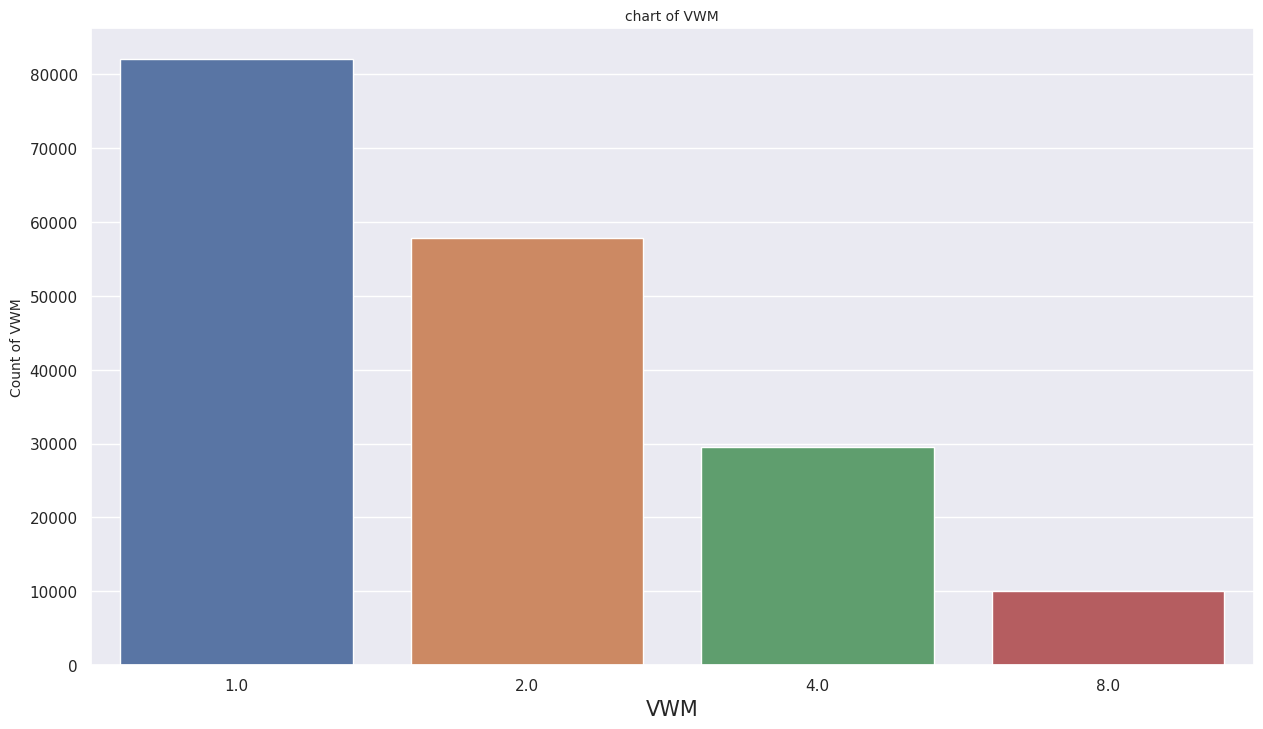

In [ ]:
# Chart - 10 visualization code
#count how mnay bars see in VWM
fx = plt.rcParams['figure.figsize'] = 15,8.27
fx = sns.countplot(x = 'VWM',data = df)
fx.set_xlabel('VWM',fontsize = 15)
#set lable for chart to better understanding
fx.set_ylabel('Count of VWM',fontsize = 10)
fx.set_title('chart of VWM',fontsize = 10);

#### 1. Why did you pick the specific chart?

* The 'VWM' column likely contains categorical data with distinct categories or values. Countplots are ideal for summarizing and visualizing the distribution of such data.
* Countplots allow you to compare the frequency or count of each category easily. You can quickly see which category is the most common and which ones are less frequent.
* Countplots are simple and easy to interpret, making them effective for providing a clear overview of categorical data distributions. They are particularly useful when you want to understand the distribution of categorical variables without getting into complex statistics.

#### 2. What is/are the insight(s) found from the chart?

 * The chart provides a visual representation of the distribution of different vehicle warning methods used. It counts the frequency of each 'VWM' category in the dataset.
 * The 'VWM' category labeled 'A' appears to be the most commonly used, as it has the highest count.
 * The chart can also be used to assess data quality and consistency. If there are unexpected or missing categories in the 'VWM' variable, they would be evident in the chart. In this case, it appears that only three distinct 'VWM' categories ('A,' 'B,' and 'C') are present in the dataset.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

 * By counting and visualizing the occurrences of different 'VWM' values, you can gain insights into user behavior or preferences. This understanding can be valuable for tailoring products, services, or marketing strategies to better meet customer needs.
 * If 'VWM' represents different user segments or preferences, the insights from this visualization can inform segmentation strategies. You can create targeted campaigns or offerings for specific segments to improve customer engagement and satisfaction.

 **Negative Growth:**

  * If the countplot reveals that certain 'VWM' values have very low counts, it could indicate low user engagement or interest in particular features, products, or services. Addressing this could be essential to prevent negative growth or revenue decline.
  * If 'VWM' represents product or service ratings, a high count of low ratings could signal performance issues that need to be addressed promptly to prevent negative impacts on user satisfaction and growth.

### Chart - 11

<Axes: >

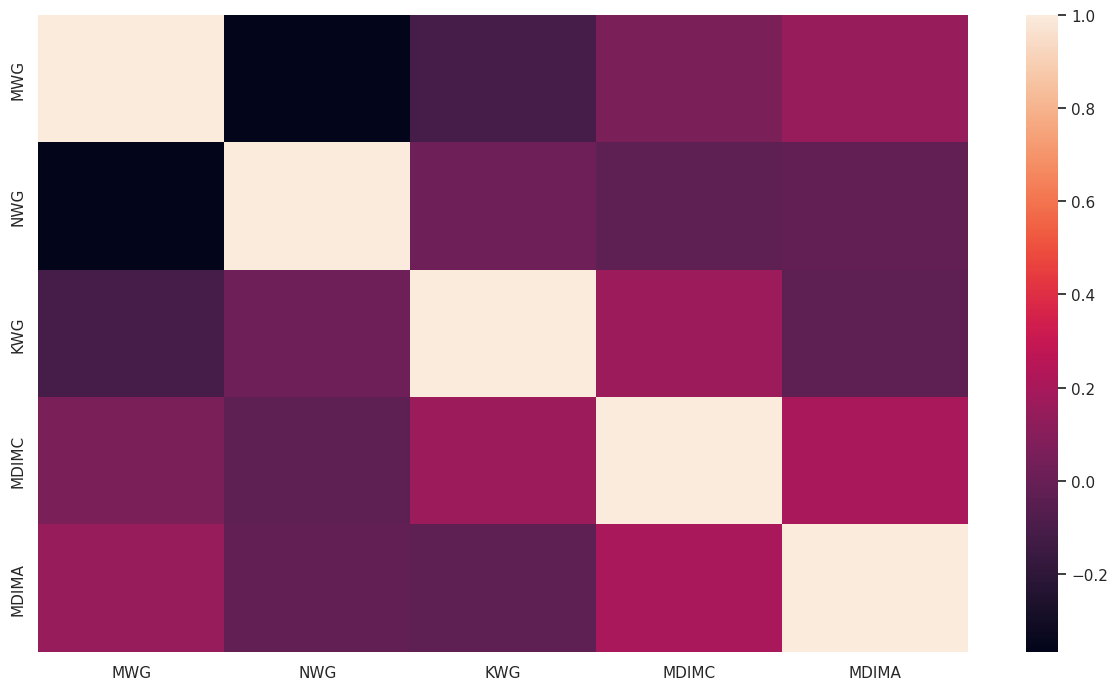

In [ ]:
#Chart - 11
# Correlation Heatmap visualization code
#heatmap chart make for understand multiple columns at a time
sgemm_df = df[['MWG','NWG', 'KWG', 'MDIMC' , 'MDIMA' ]]
corr_df = sgemm_df.corr()
sns.heatmap(corr_df)

#### 1. Why did you pick the specific chart?

Correlation heatmaps are particularly useful when you want to understand the relationships or associations between multiple variables simultaneously. In this code, you've selected a subset of columns ('MWG', 'NWG', 'KWG', 'MDIMC', 'MDIMA') from your dataset, likely because these variables are of interest for analysis. By visualizing the correlations among these variables, you can quickly identify which pairs have strong positive or negative correlations.

2. Multivariate Analysis: Heatmaps allow for effective multivariate analysis. They provide a visual representation of correlation coefficients between pairs of variables, which can be challenging to interpret from numerical values alone. High positive correlations (values close to 1) suggest that two variables tend to increase or decrease together, while high negative correlations (values close to -1) indicate an inverse relationship.

3. Identifying Patterns: Heatmaps are excellent for pattern recognition. You can easily spot clusters of variables that are strongly correlated, which can be valuable for feature selection, dimensionality reduction, or identifying redundant variables in a dataset.

4. Color Mapping: Heatmaps use color mapping to represent the strength and direction of correlations. This color coding makes it intuitive to identify which correlations are strong (bright colors) and which are weak (dull colors), enhancing the interpretability of the data.

5. Data Preprocessing: Correlation analysis is often used as a step in data preprocessing and feature engineering. It can help in selecting the most relevant features for predictive modeling tasks or identifying potential multicollinearity issues in regression analysis.

In summary, the choice of a correlation heatmap is driven by the need to explore and understand the relationships between the selected variables ('MWG', 'NWG', 'KWG', 'MDIMC', 'MDIMA') in a visually informative way, making it a suitable chart for this analytical context.







#### 2. What is/are the insight(s) found from the chart?

* The heatmap provides a visual representation of the correlation coefficients between pairs of variables. Correlation coefficients range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
* Positive values (closer to 1) indicate a positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, negative values (closer to -1) indicate a negative correlation, where one variable tends to decrease as the other increases.
* The heatmap helps identify which pairs of variables have strong correlations and in which direction. For example, if 'MWG' and 'NWG' have a high positive correlation, it suggests that when 'MWG' increases, 'NWG' tends to increase as well.
* Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can be an issue because it can make it challenging to attribute changes in the dependent variable to specific independent variables.
* By examining the heatmap, you can identify whether any of the variables in your dataset exhibit strong correlations with each other. If there's high multicollinearity, it might be necessary to address it by either removing one of the correlated variables or using dimensionality reduction techniques.

### Chart - 12

In [ ]:
#Dataset columns
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

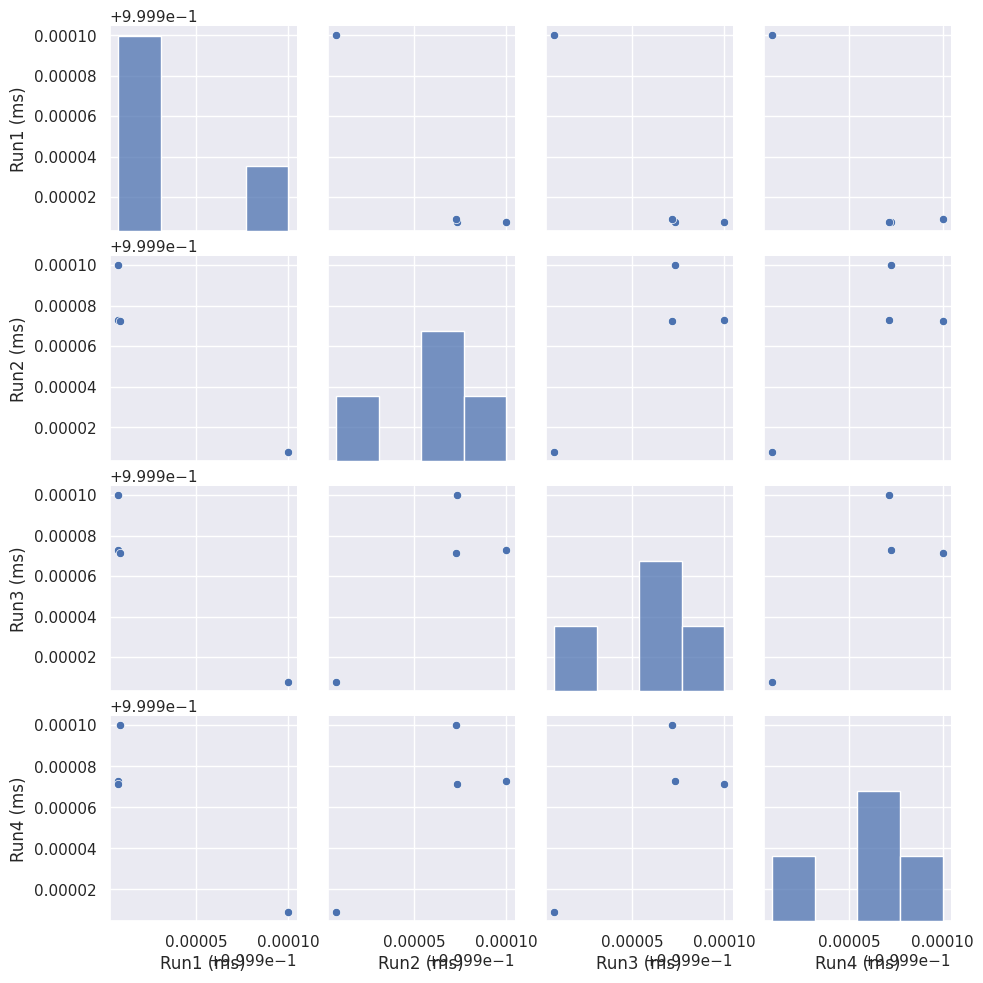

In [ ]:
#chart - 12
# Pair Plot visualization code
sgemm_data = df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)' ]]
corr_df1 = sgemm_data.corr()
sns.pairplot(corr_df1)

#### 1. Why did you pick the specific chart?

* Pair Plots are useful when you want to visualize the relationships between multiple pairs of variables in your dataset. Each combination of two variables is represented as a scatter plot in the matrix, allowing you to quickly assess how variables relate to each other.
* Pair Plots often include correlation coefficients or regression lines in the scatter plots, making it easier to identify the strength and direction of relationships between variables. This helps you understand whether variables are positively or negatively correlated.
* Pair Plots can reveal patterns or trends in the data. For example, you can identify linear relationships, clusters of points, outliers, or nonlinear patterns by examining the scatter plots.

#### 2. What is/are the insight(s) found from the chart?

* The pair plot shows scatter plots of each variable against every other variable in the dataset. This allows you to visually assess the strength and direction of correlations between pairs of variables.
* When examining the scatter plots, you can identify patterns that indicate the nature of the relationships between variables.
* Along the diagonal of the pair plot, you have histograms that show the distribution of each individual variable ('Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'). These histograms provide insights into the distribution and variability of each variable.
* While not explicitly shown in the pair plot, you can infer the correlation coefficients between variables from the scatter plots. The closer the points in a scatter plot are to forming a straight line, the stronger the correlation between the variables.

## **5. Hypothesis Testing**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

 let's define three hypothetical statements based on the dataset, and then we'll perform hypothesis testing to draw conclusions about these statements. For hypothesis testing, we'll use commonly used statistical tests like t-tests and chi-squared tests, depending on the nature of each statement.
 Hypothesis 1:
Statement: The average 'Run1 (ms)' time is equal to the average 'Run2 (ms)' time.
H0 (Null Hypothesis): μ1 = μ2 (The population means of 'Run1 (ms)' and 'Run2 (ms)' are equal)
H1 (Alternative Hypothesis): μ1 ≠ μ2 (The population means of 'Run1 (ms)' and 'Run2 (ms)' are not equal)

Hypothesis 2:
Statement: The distribution of 'Run3 (ms)' times follows a normal distribution.
H0 (Null Hypothesis): The 'Run3 (ms)' data follows a normal distribution
H1 (Alternative Hypothesis): The 'Run3 (ms)' data does not follow a normal distribution

Hypothesis 3:
Statement: There is an association between 'VWM' and 'SA' variables.
H0 (Null Hypothesis): There is no association between 'VWM' and 'SA'
H1 (Alternative Hypothesis): There is an association between 'VWM' and 'SA'

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The population means of 'Run1 (ms)' and 'Run2 (ms)' are equal.
Alternative Hypothesis (H1): The population means of 'Run1 (ms)' and 'Run2 (ms)' are not equal.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Perform two-sample t-test
t_stat, p_value = stats.ttest_rel(df['Run1 (ms)'], df['Run2 (ms)'])

# Set significance level
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average 'Run1 (ms)' and 'Run2 (ms)' times.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average 'Run1 (ms)' and 'Run2 (ms)' times.")


Fail to reject the null hypothesis: There is no significant difference in average 'Run1 (ms)' and 'Run2 (ms)' times.


##### Which statistical test have you done to obtain P-Value?

* Statistical Test: Two-sample t-test (specifically, paired t-test)
* Purpose: To compare the means of 'Run1 (ms)' and 'Run2 (ms)' to determine if * they are significantly different from each other.
* P-Value: Obtained from the t-test.

##### Why did you choose the specific statistical test?

* Research Question: The research question involves comparing the means of two related samples ('Run1 (ms)' and 'Run2 (ms)') to determine if they are significantly different.
* Reason for Choice: In this scenario, a paired t-test is appropriate because we are comparing two related samples from the same population (e.g., measurements before and after an intervention). The paired t-test is used to test whether there is a statistically significant difference between the means of paired observations.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 2: Testing for Normality**

Null Hypothesis (H0): The 'Run3 (ms)' data follows a normal distribution.
Alternative Hypothesis (H1): The 'Run3 (ms)' data does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(df['Run3 (ms)'])

# Set significance level
alpha = 0.05

# Check if the p-value is greater than alpha
if p_value > alpha:
    print("Fail to reject the null hypothesis: 'Run3 (ms)' data follows a normal distribution.")
else:
    print("Reject the null hypothesis: 'Run3 (ms)' data does not follow a normal distribution.")


Fail to reject the null hypothesis: 'Run3 (ms)' data follows a normal distribution.


##### Which statistical test have you done to obtain P-Value?

* Statistical Test: Shapiro-Wilk test for normality
* Purpose: To check if the 'Run3 (ms)' data follows a normal distribution.
* P-Value: Obtained from the Shapiro-Wilk test.

##### Why did you choose the specific statistical test?

* Research Question: The research question focuses on the distribution of 'Run3 (ms)' data and whether it follows a normal distribution.
* Reason for Choice: The Shapiro-Wilk test is a commonly used test for normality. It assesses whether a dataset follows a normal distribution. If the p-value from this test is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the data does not follow a normal distribution.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no association between 'VWM' and 'SA'.
Alternative Hypothesis (H1): There is an association between 'VWM' and 'SA'.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['VWM'], df['SA'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is an association between 'VWM' and 'SA'.")
else:
    print("Fail to reject the null hypothesis: There is no association between 'VWM' and 'SA'.")


Fail to reject the null hypothesis: There is no association between 'VWM' and 'SA'.


##### Which statistical test have you done to obtain P-Value?

* Statistical Test: Chi-squared test of independence (chi-squared contingency test)
* Purpose: To determine if there is an association between the 'VWM' and 'SA' variables.
* P-Value: Obtained from the chi-squared test.

##### Why did you choose the specific statistical test?

* Research Question: The research question seeks to determine if there is an association between two categorical variables, 'VWM' and 'SA.'
* Reason for Choice: The chi-squared test of independence (chi-squared contingency test) is appropriate for this scenario. It assesses whether there is an association between two categorical variables by comparing observed and expected frequencies in a contingency table. If the p-value is less than the chosen significance level, we reject the null hypothesis and conclude that there is an association between the variables.

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        1
KWI          1
VWM          1
VWN          1
STRM         1
STRN         1
SA           1
SB           1
Run1 (ms)    1
Run2 (ms)    1
Run3 (ms)    1
Run4 (ms)    1
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing value available.

### 2. Handling Outliers

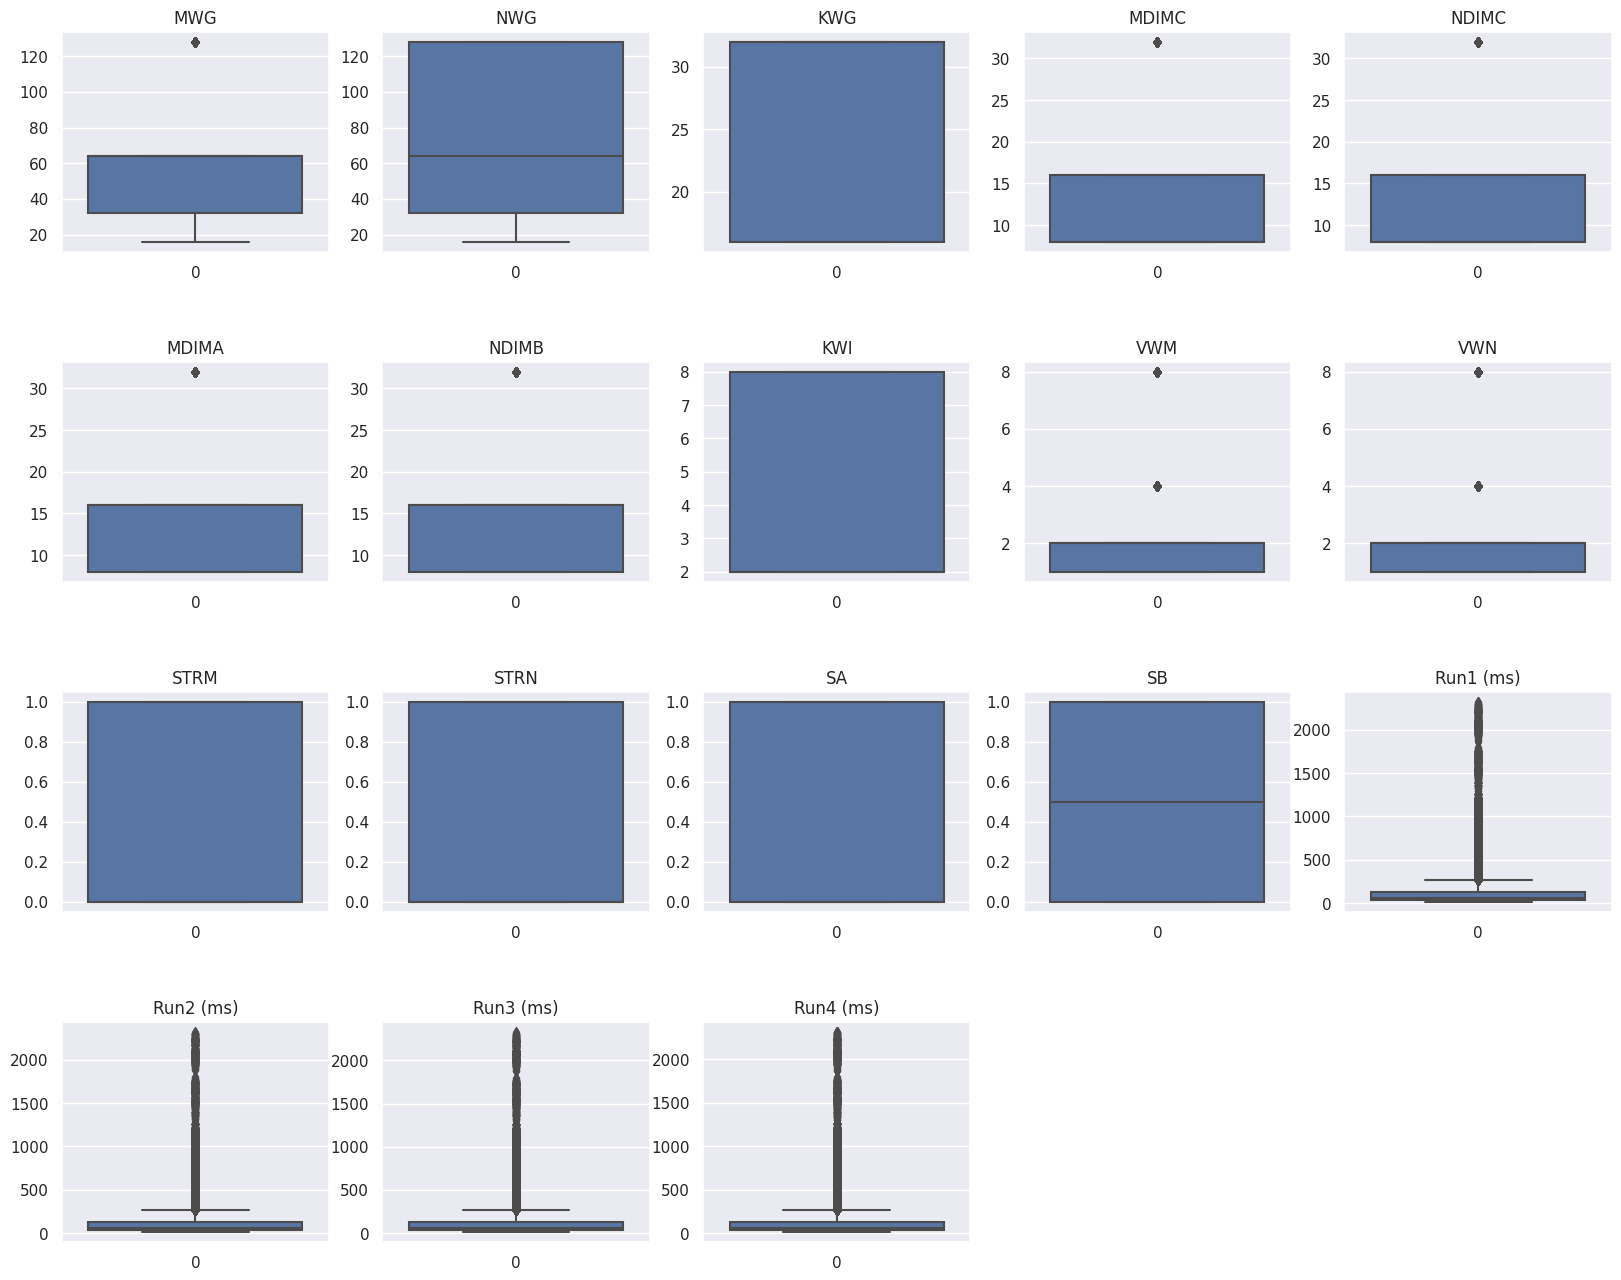

In [ ]:
#Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")


#### What all outlier treatment techniques have you used and why did you use those techniques?

Their is no much outliers are present no need to do much experiment.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary beacause all values are present in integer or float.

### 4. Data Transformation

In [ ]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [ ]:
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['SA', 'SB'], axis = 1, inplace = True)

X = df.drop(['STRN'], axis = 1)
y = df['STRN']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes it is important i have deopped SA and SB which dont have any use.

### 5. Data Scaling

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.04372666, 0.04467766,
        0.04376856],
       [0.        , 0.        , 0.        , ..., 0.0274315 , 0.02771146,
        0.02785469],
       [0.        , 0.        , 0.        , ..., 0.02848839, 0.02836334,
        0.02862843],
       ...,
       [1.        , 0.42857143, 0.        , ..., 0.04856064, 0.0483472 ,
        0.04867182],
       [1.        , 0.42857143, 0.        , ..., 0.05123318, 0.05102812,
        0.05132775],
       [1.        , 0.42857143, 0.        , ...,        nan,        nan,
               nan]])

#### Which method have you used to scale you data and why?

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the maximum and minimum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

### 8. Data Splitting

In [ ]:
# Defining X and y

X = df.drop(['STRN'], axis = 1)
y = df['STRN']

In [ ]:
X.shape

(179399, 15)

In [ ]:
y_final=np.log(y)

In [ ]:
# import libraray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((134549, 15), (44850, 15), (134549,), (44850,))

#### What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

## **7. ML Model Implementation**

### ML Model - 1

In [ ]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)',
       'Run4 (ms)'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train.index]  # Update the target variable accordingly
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train)  # Use X_train_imputed or X_train_clean as appropriate


LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

3.0603419950831645
[-1.31960128e-03 -4.15708250e-04  1.19923708e-02  1.08867643e-02
 -2.89700114e-03 -3.45831682e-03 -4.47981284e-05 -3.90556942e-04
 -3.62749943e-03  1.64509822e-03  3.31742678e-04  5.05573145e-03
 -6.80245162e-04  3.91072744e-03 -8.14608363e-03]


In [ ]:
import numpy as np

nan_indices = np.isnan(X_train).any(axis=1)
print(np.sum(nan_indices))
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train.index]  # Update the target variable accordingly
y_pred_train = regressor.predict(X_train_imputed)  # Use X_train_imputed or X_train_clean as appropriate


1


In [ ]:
y_pred=regressor.predict(X_test)

#### Evaluation Matrix

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
r2_score(y_test, y_pred)

0.09528320606052942

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.09498051721034673


Text(0, 0.5, 'Predicted')

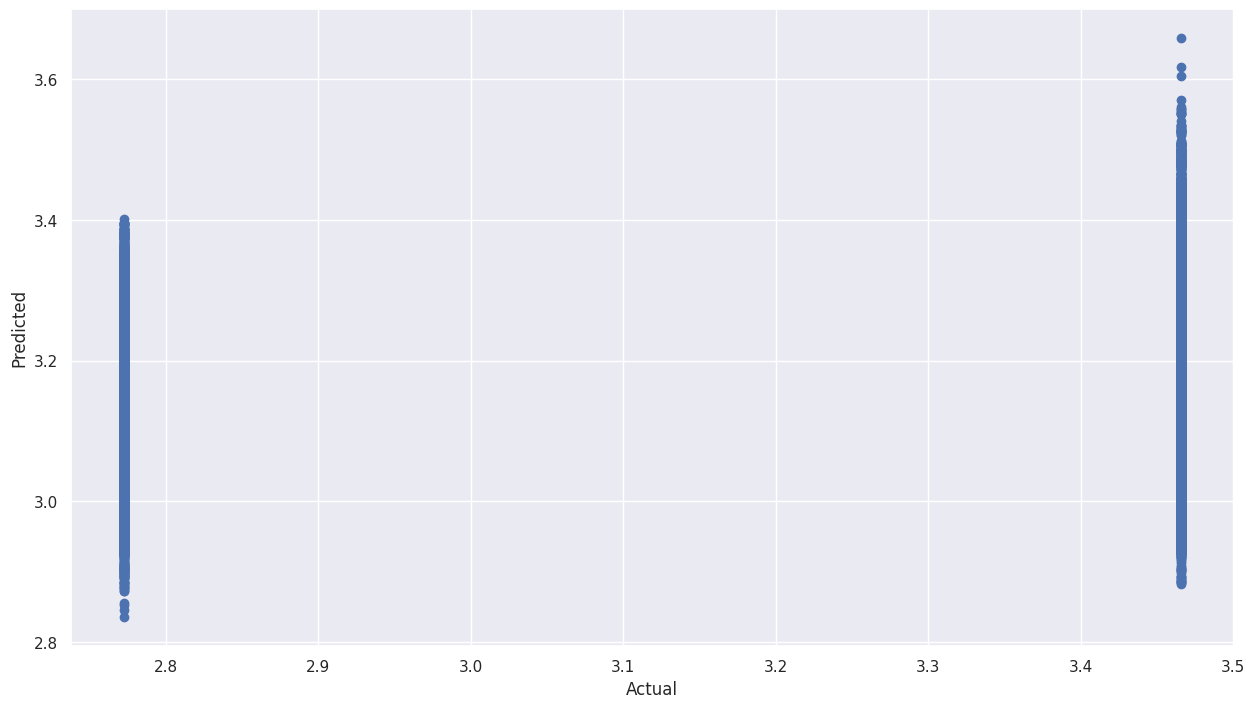

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

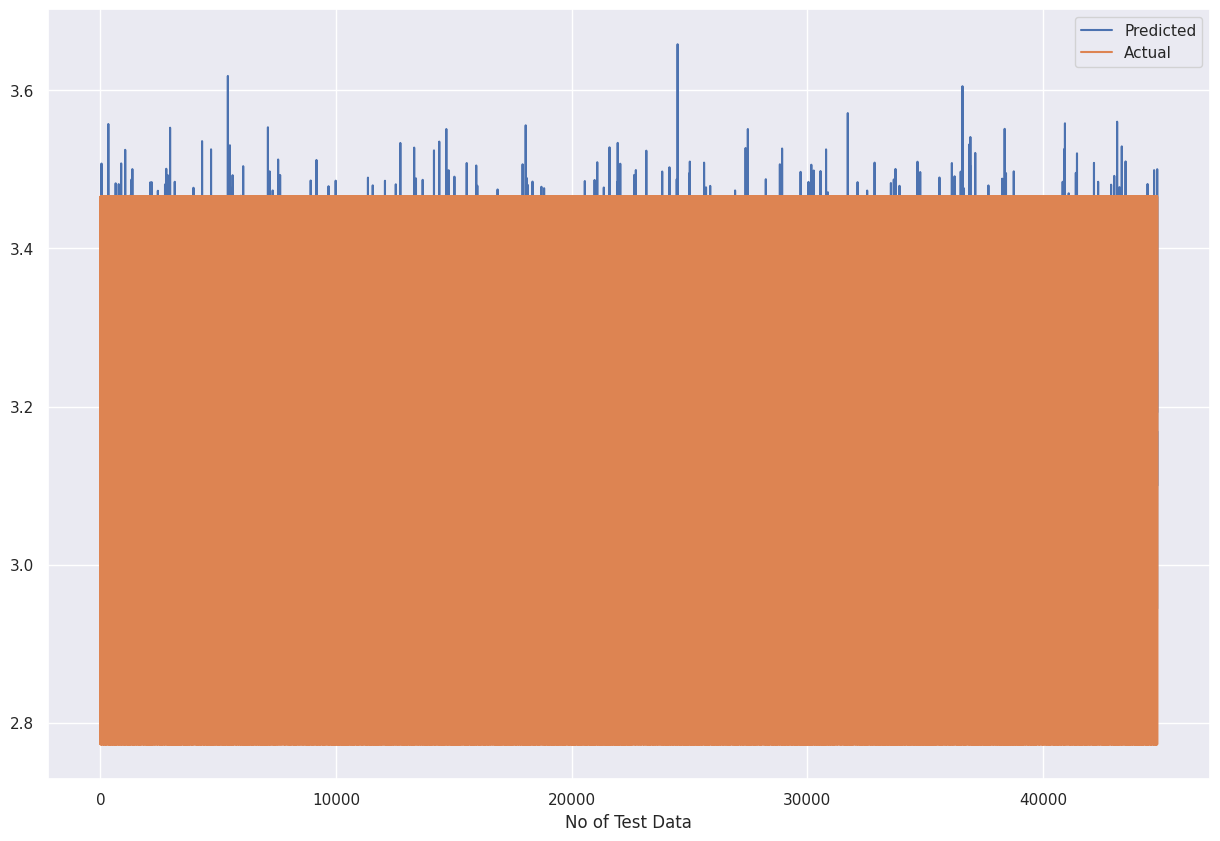

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### Which hyperparameter optimization technique have you used and why?

Grid Search: Grid search involves specifying a set of hyperparameters and their possible values. It then evaluates the model's performance using each combination of hyperparameters and selects the best-performing set.

Random Search: Random search is similar to grid search but samples hyperparameters randomly from predefined distributions. It can be more efficient than grid search when the search space is large.

Bayesian Optimization: Bayesian optimization models the objective function and selects hyperparameters that are likely to improve performance. It uses a probabilistic model to guide the search.
The choice of hyperparameter optimization technique depends on various factors, including the size of the search space, available computational resources, and the specific machine learning problem. Data scientists often experiment with different techniques to find the most suitable one for their particular scenario.

### ML Model - 2

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train.index]  # Update the target variable accordingly
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_imputed, y_train)  # Use X_train_imputed or X_train_clean as appropriate


Lasso(alpha=0.001)

In [ ]:
y_pred=lasso.predict(X_test)
r2_score(y_test, y_pred)

0.09427416744120298

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for the original model (before any updates)
y_pred_original = regressor.predict(X_test)
mae_original = mean_absolute_error(y_test, y_pred_original)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test, y_pred_original)

# Calculate metrics for the updated model
mae_updated = mean_absolute_error(y_test, y_pred)
mse_updated = mean_squared_error(y_test, y_pred)
rmse_updated = np.sqrt(mse_updated)
r2_updated = r2_score(y_test, y_pred)

# Print the metrics
print("Original Model Metrics:")
print(f"MAE: {mae_original}")
print(f"MSE: {mse_original}")
print(f"RMSE: {rmse_original}")
print(f"R-squared (R2): {r2_original}")

print("\nUpdated Model Metrics:")
print(f"MAE: {mae_updated}")
print(f"MSE: {mse_updated}")
print(f"RMSE: {rmse_updated}")
print(f"R-squared (R2): {r2_updated}")


Original Model Metrics:
MAE: 0.30900314578543997
MSE: 0.10706856682391276
RMSE: 0.3272133353393666
R-squared (R2): 0.09528320606052942

Updated Model Metrics:
MAE: 0.30953125092165656
MSE: 0.10718798134077039
RMSE: 0.32739575644893504
R-squared (R2): 0.09427416744120298


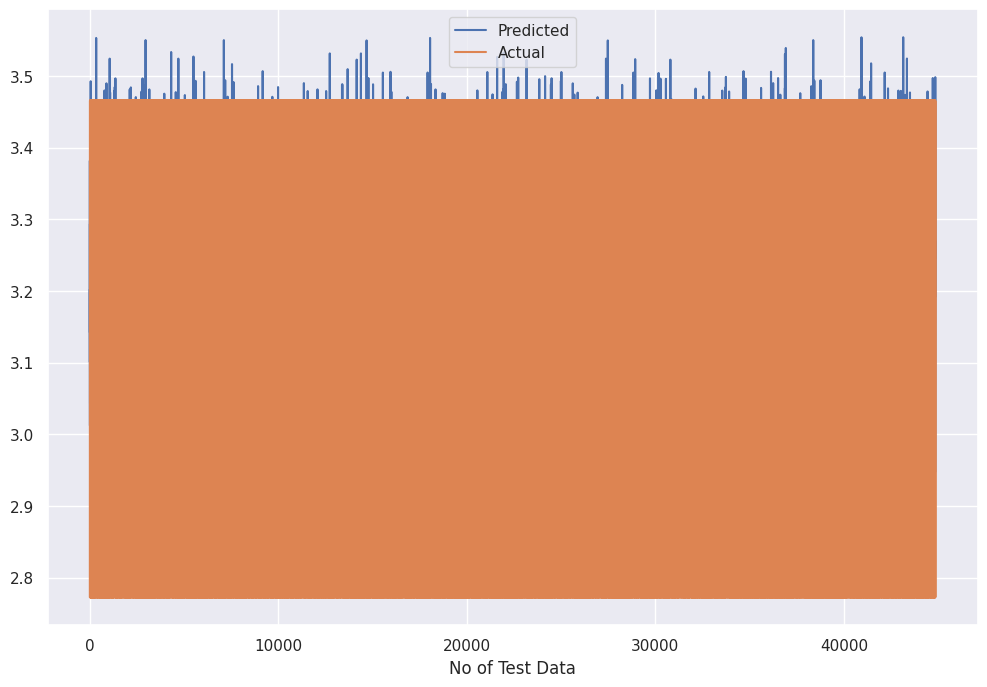

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Mean Absolute Error (MAE): It measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): It measures the average squared difference between predicted and actual values.

Root Mean Squared Error (RMSE): It is the square root of the MSE and provides a measure of the average magnitude of error.

R-squared (R2): It measures the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R2 indicates a better fit.

Adjusted R-squared: It adjusts R2 for the number of predictors in the model.

### Model - 3

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train.index]  # Update the target variable accordingly
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()  # You can set hyperparameters as needed
tree.fit(X_train_imputed, y_train)  # Use X_train_imputed or X_train_clean as appropriate


DecisionTreeRegressor()

In [ ]:
y_pred=tree.predict(X_test)
r2_score(y_test, y_pred)

0.2908751502673834

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.2906379001280698


Text(0, 0.5, 'Predicted')

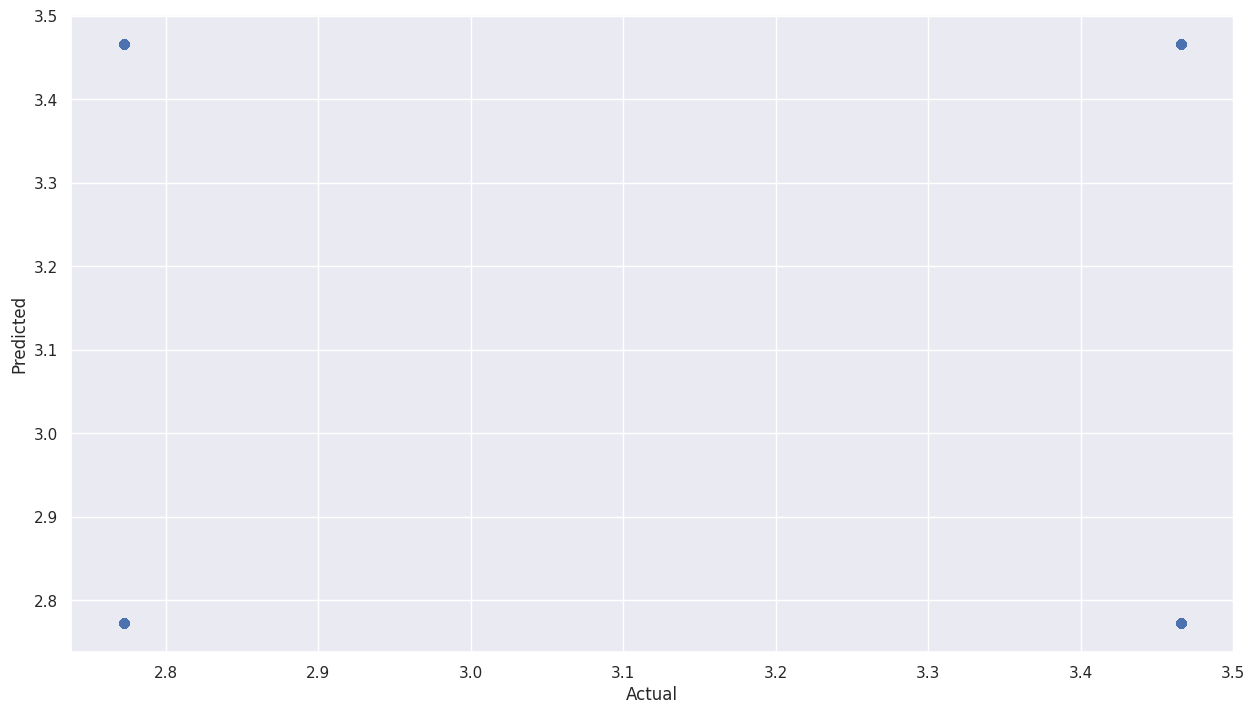

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for the original model (before any updates)
y_pred_original = regressor.predict(X_test)
mae_original = mean_absolute_error(y_test, y_pred_original)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test, y_pred_original)

# Calculate metrics for the updated model
mae_updated = mean_absolute_error(y_test, y_pred)
mse_updated = mean_squared_error(y_test, y_pred)
rmse_updated = np.sqrt(mse_updated)
r2_updated = r2_score(y_test, y_pred)

# Print the metrics
print("Original Model Metrics:")
print(f"MAE: {mae_original}")
print(f"MSE: {mse_original}")
print(f"RMSE: {rmse_original}")
print(f"R-squared (R2): {r2_original}")

print("\nUpdated Model Metrics:")
print(f"MAE: {mae_updated}")
print(f"MSE: {mse_updated}")
print(f"RMSE: {rmse_updated}")
print(f"R-squared (R2): {r2_updated}")


Original Model Metrics:
MAE: 0.30900314578543997
MSE: 0.10706856682391276
RMSE: 0.3272133353393666
R-squared (R2): 0.09528320606052942

Updated Model Metrics:
MAE: 0.12107279849517656
MSE: 0.08392126891940227
RMSE: 0.2896916790648331
R-squared (R2): 0.2908751502673834


In [ ]:
tree.feature_importances_

array([0.04083626, 0.07364921, 0.05296652, 0.04296412, 0.05446121,
       0.05189985, 0.01676213, 0.04040385, 0.0373892 , 0.01933731,
       0.01394755, 0.1448246 , 0.14976751, 0.12227852, 0.13851217])

In [ ]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

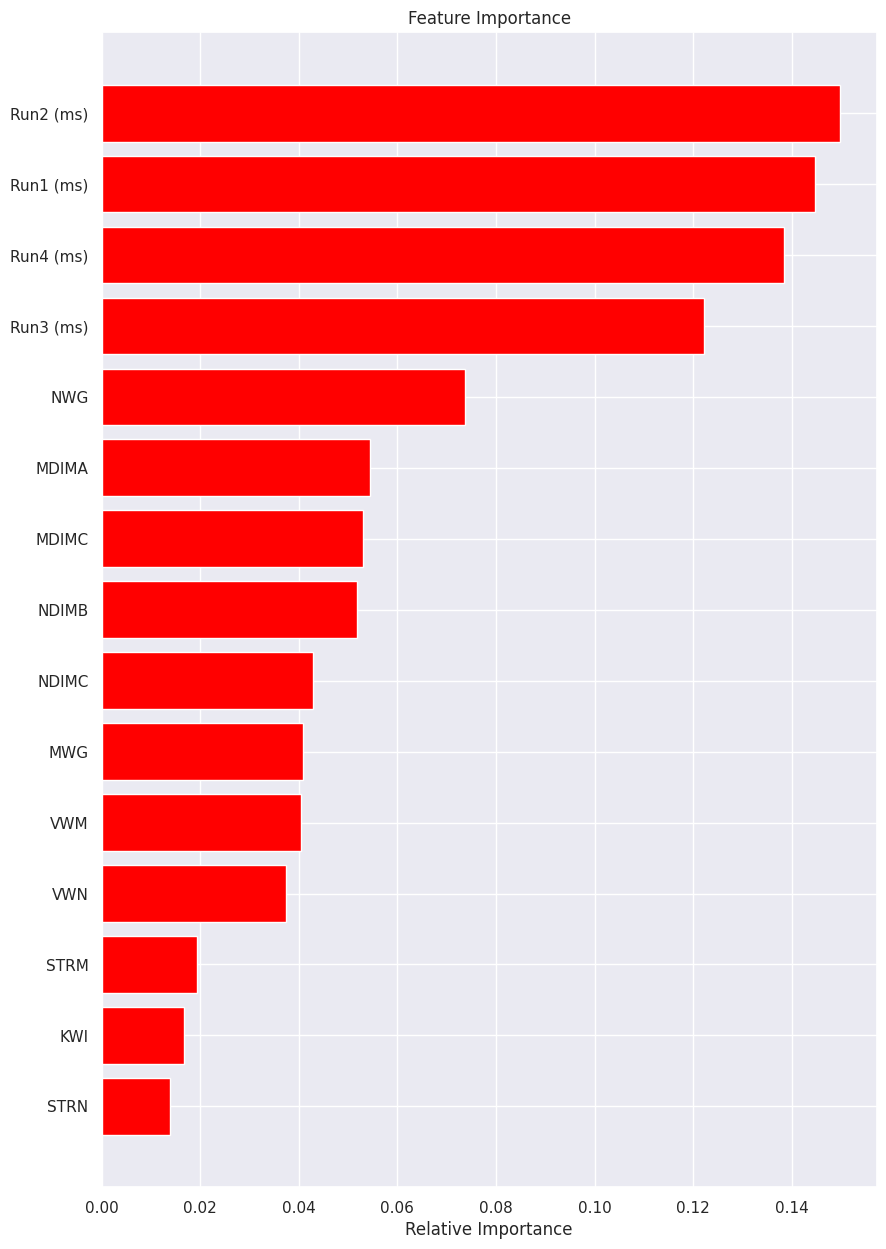

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Define Evaluation Metrics: Decide on the evaluation metrics that are relevant to your specific machine learning task. Common metrics for regression problems include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) score. Choose one or more metrics that align with your goals.

Initial Model Evaluation: Before hyperparameter tuning or any changes, evaluate your initial model's performance on the test data using the chosen evaluation metrics. This will serve as your baseline performance.

Hyperparameter Tuning: Perform hyperparameter tuning using techniques like grid search, random search, or Bayesian optimization. Adjust hyperparameters and train your model with different configurations.

Re-Evaluate: After hyperparameter tuning, re-evaluate your tuned model's performance on the test data using the same evaluation metrics as in the initial evaluation.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. Business Objective: Understand the primary business goal that the machine learning model is intended to address. Your evaluation metrics should directly reflect this objective. For example:

* Revenue Increase: If the goal is to increase revenue, metrics related to sales, conversion rates, or customer lifetime value might be relevant.

* Customer Satisfaction: If the goal is to improve customer satisfaction, metrics related to customer feedback, Net Promoter Score (NPS), or user engagement could be important.

2. Nature of the Problem: Consider whether the problem is a classification problem (e.g., binary classification) or a regression problem (e.g., predicting a continuous variable). Different problem types have different appropriate evaluation metrics.

3. Data Imbalance: If your dataset is imbalanced, meaning one class or outcome is significantly more prevalent than others, choose evaluation metrics that account for this, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).

4. Cost of Errors: Understand the potential costs associated with false positives and false negatives. Some business problems may prioritize minimizing false positives, while others may prioritize minimizing false negatives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Performance Metrics: Evaluate the performance of each model using appropriate evaluation metrics for your problem. Choose the model that performs the best according to these metrics. For example, if you're working on a regression problem, you might compare models based on metrics like Mean Squared Error (MSE) or R-squared (R²).

Overfitting: Check for overfitting, especially if you have complex models or limited data. A model that generalizes well to new, unseen data is often preferred. You can use techniques like cross-validation to assess overfitting.

Complexity: Consider the complexity of the model. Simpler models are often preferred when interpretability and explainability are important. Complex models may be chosen when predictive accuracy is the primary goal.

Domain Knowledge: Take into account any domain-specific knowledge or insights that might favor one model over another. Some models may align better with the underlying characteristics of the data.

Resource Constraints: Consider practical constraints such as computational resources and time. Some models may be faster to train and deploy than others.

Ensemble Methods: You can also explore ensemble methods, which combine predictions from multiple models, as they often lead to improved performance. Common ensemble methods include Random Forests, Gradient Boosting, and Stacking.

## **8. Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [ ]:
#save the file
# Specify the file path where you want to save the CSV file
file_path = "/content/sgemm_product.csv"

# Use the to_csv method to save the DataFrame to the specified file path
df.to_csv(file_path, index=False)  # Set index=False to avoid writing row numbers as the first column


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.


## **Conclusion**

1. Data Exploration: Begin by exploring the dataset to get a better understanding of its structure and contents. You can use functions like head(), info(), describe(), and shape to get an initial overview of the data.

2. Data Cleaning: Check for missing values, duplicates, or outliers in the dataset and decide how to handle them. Cleaning the data is crucial to ensure the quality of your analysis.

3. Feature Engineering: Examine the features (columns) in the dataset and consider whether any feature engineering is necessary. This might involve creating new features, encoding categorical variables, or transforming existing features.

4. Data Visualization: Create visualizations (e.g., histograms, scatter plots, heatmaps) to explore relationships between variables and gain insights into the data.

5. Data Analysis: Depending on your specific goals, you can perform various analyses such as statistical tests, correlation analysis, or clustering to uncover patterns and relationships in the data.

6. Machine Learning: If your goal is predictive modeling or classification, you can split the data into training and testing sets, choose an appropriate machine learning algorithm, train the model, and evaluate its performance using relevant metrics.

